===========iteration:0===========
SGD:2.4389208595912644
Momentum:2.43386396147464
AdaGrad:2.1299786970447263
Adam:2.178510512973146
===========iteration:100===========
SGD:1.3611543730682554
Momentum:0.3535564137789778
AdaGrad:0.1534301146564242
Adam:0.30001591596729693
===========iteration:200===========
SGD:0.7096482268827309
Momentum:0.1706430842962017
AdaGrad:0.07007239663388018
Adam:0.12605763340259352
===========iteration:300===========
SGD:0.43927142810273645
Momentum:0.1377431302101409
AdaGrad:0.054488669750351756
Adam:0.09552307212718819
===========iteration:400===========
SGD:0.44823123005169313
Momentum:0.283788275015625
AdaGrad:0.12104846382902287
Adam:0.22530973631748583
===========iteration:500===========
SGD:0.38614544027661596
Momentum:0.1853477173835516
AdaGrad:0.05865243869228383
Adam:0.13167215540391358
===========iteration:600===========
SGD:0.2302418987493476
Momentum:0.08676776265690402
AdaGrad:0.01902977712887938
Adam:0.050628208877527545
===========iteration:70

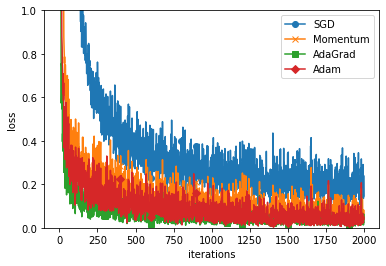

In [2]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, train_loss[key], marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [5]:
window_len = 11
s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
w = np.kaiser(window_len, 2)
y = np.convolve(w/w.sum(), s, mode='valid')
print(s)

[  10    9    8 ... 1992 1991 1990]
